# Plot fields on the map

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from mpl_toolkits.basemap import Basemap

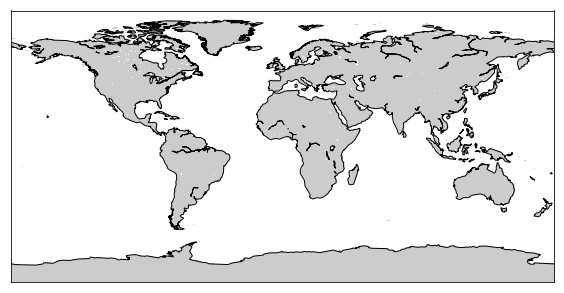

In [25]:
f = plt.figure(figsize=(10,5))
m = Basemap()
m.drawcoastlines()
# m.shadedrelief()
# m.bluemarble()
m.drawlsmask()
# m.etopo()

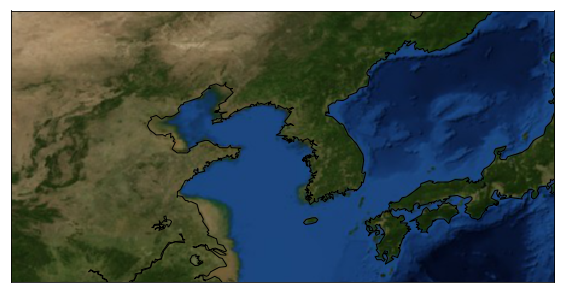

In [15]:
f = plt.figure(figsize=(10,5))
m = Basemap(llcrnrlon=110, llcrnrlat=30, urcrnrlon=140, urcrnrlat=45,
            resolution='l')
m.drawcoastlines()
# m.shadedrelief()
m.bluemarble()
# m.etopo()

In [20]:
f = Dataset('SST_Reyn_Smith.nc', 'r')
lon = f.variables['X'][:]
lat = f.variables['Y'][:]
sst = f.variables['sst'][:]
f.close()
X, Y = np.meshgrid(lon, lat)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


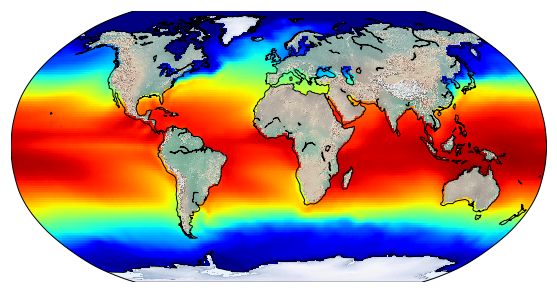

In [26]:
f = plt.figure(figsize=(10,5))
m = Basemap(projection='robin', lon_0=0, resolution='c')
m.drawcoastlines()
m.shadedrelief()
# ax.set_extent((110, 140, 30, 45))
m.pcolormesh(X, Y, sst[0,...], cmap='jet', latlon=True)

In [29]:
dir(m)

['__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_ax_plt_from_kw',
 '_bm_file',
 '_bm_lats',
 '_bm_lons',
 '_bm_rgba',
 '_bm_rgba_warped',
 '_boundarypolyll',
 '_boundarypolyxy',
 '_check_ax',
 '_cliplimb',
 '_fulldisk',
 '_getmapboundary',
 '_initialized_axes',
 '_mapboundarydrawn',
 '_readboundarydata',
 '_restore_hold',
 '_save_use_hold',
 '_tmp_hold',
 'anchor',
 'arcgisimage',
 'area_thresh',
 'aspect',
 'ax',
 'barbs',
 'bluemarble',
 'boundarylats',
 'boundarylons',
 'boundinglat',
 'celestial',
 'coastpolygons',
 'coastpolygontypes',
 'coastsegs',
 'colorbar',
 'contour',
 'contourf',
 'drawcoastlines',
 'drawcounties',
 'drawcountries',
 'drawgrea

In [37]:
m.xmin?

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(11820463.951535452, 13415194.317132365)

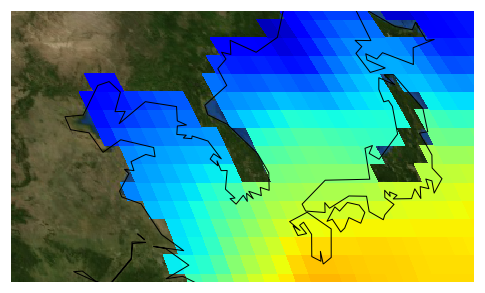

In [44]:
f, ax = plt.subplots(1, 1, figsize=(10,5))
m = Basemap(projection='robin', lon_0=0, resolution='c')
m.drawcoastlines()
m.bluemarble()
m.pcolormesh(X, Y, sst[0,...], cmap='jet', latlon=True)
x0, y0 = m(110, 30)
x1, y1 = m(150, 45)
ax.set_xlim([x0, x1])
ax.set_ylim([y0, y1])

In [45]:
f = Dataset('uwnd.mon.mean.nc', 'r')
print(f.variables.keys())
uwind = f.variables['uwnd'][:]    # monthly data
lon = f.variables['lon'][:]
lat = f.variables['lat'][:]
f.close()
f = Dataset('vwnd.mon.mean.nc', 'r')
print(f.variables.keys())
vwind = f.variables['vwnd'][:]    # monthly data
lon = f.variables['lon'][:]
lat = f.variables['lat'][:]
f.close()

odict_keys(['lat', 'lon', 'time', 'uwnd'])
odict_keys(['lat', 'lon', 'time', 'vwnd'])


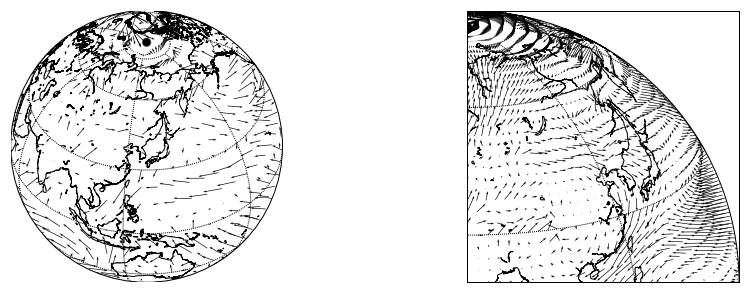

In [68]:
intv=3
X, Y =np.meshgrid(lon, lat)
f, ax = plt.subplots(1, 2, figsize=(15,5))
m = Basemap(projection='ortho',lon_0=130,lat_0=40,resolution='l', ax=ax[0])
m.drawcoastlines()
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,360.,60.))
m.quiver(X[::intv, ::intv], Y[::intv, ::intv], uwind[-1, ::intv, ::intv], vwind[-1, ::intv, ::intv],
         scale=1e2, latlon=True)

lat_0=10.; lon_0=57.
# resolution = None means don't process the boundary datasets.
m1 = Basemap(projection='ortho',lon_0=80,lat_0=20,resolution=None)
# plot just upper right quadrant (corners determined from global map).
# keywords llcrnrx,llcrnry,urcrnrx,urcrnry used to define the lower
# left and upper right corners in map projection coordinates.
# llcrnrlat,llcrnrlon,urcrnrlon,urcrnrlat could be used to define
# lat/lon values of corners - but this won't work in cases such as this
# where one of the corners does not lie on the earth.
m = Basemap(projection='ortho',lon_0=80,lat_0=20,resolution='l',\
    llcrnrx=0.,llcrnry=0.,urcrnrx=m1.urcrnrx/2.,urcrnry=m1.urcrnry/2., ax=ax[1])
m.drawcoastlines()
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,360.,60.))
m.drawmapboundary()
m.quiver(X, Y, uwind[-1,:,:], vwind[-1,:,:], scale=1e2, latlon=True)

(<matplotlib.quiver.Barbs at 0x11c765550>,
 <matplotlib.quiver.Barbs at 0x12803f630>)

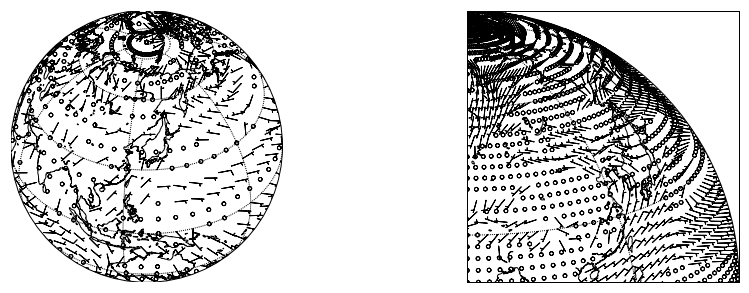

In [71]:
intv=3
X, Y =np.meshgrid(lon, lat)
f, ax = plt.subplots(1, 2, figsize=(15,5))
m = Basemap(projection='ortho',lon_0=130,lat_0=40,resolution='l', ax=ax[0])
m.drawcoastlines()
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,360.,60.))
m.barbs(X[::intv, ::intv], Y[::intv, ::intv], uwind[-1, ::intv, ::intv], vwind[-1, ::intv, ::intv], 
        length=5, latlon=True)

lat_0=10.; lon_0=57.
# resolution = None means don't process the boundary datasets.
m1 = Basemap(projection='ortho',lon_0=80,lat_0=20,resolution=None)
# plot just upper right quadrant (corners determined from global map).
# keywords llcrnrx,llcrnry,urcrnrx,urcrnry used to define the lower
# left and upper right corners in map projection coordinates.
# llcrnrlat,llcrnrlon,urcrnrlon,urcrnrlat could be used to define
# lat/lon values of corners - but this won't work in cases such as this
# where one of the corners does not lie on the earth.
m = Basemap(projection='ortho',lon_0=80,lat_0=20,resolution='l',\
    llcrnrx=0.,llcrnry=0.,urcrnrx=m1.urcrnrx/2.,urcrnry=m1.urcrnry/2., ax=ax[1])
m.drawcoastlines()
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,360.,60.))
m.drawmapboundary()
m.barbs(X, Y, uwind[-1,:,:], vwind[-1,:,:], length=5, latlon=True)